In [42]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from sklearn import preprocessing
import pandas as pd

In [43]:
(train_x,train_y),(test_x,test_y)=boston_housing.load_data(
        path='boston_housing_npz',
        test_split=0.2,
        seed=42
)

In [44]:
train_x_df=pd.DataFrame(train_x)
train_y_df=pd.DataFrame(train_y)

train_x_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
5,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
6,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
7,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
8,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
9,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33


In [45]:
train_x_df.info()
print('__'*20)
train_y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [46]:
train_x_df.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [47]:
print("Train shape ",train_x.shape)
print("Test shape ",test_x.shape)
print("Actual Train output ",train_y.shape)
print("Actual Test output ",test_y.shape)

Train shape  (404, 13)
Test shape  (102, 13)
Actual Train output  (404,)
Actual Test output  (102,)


In [48]:
train_x[0]

array([9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
       6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
       1.6600e+01, 3.9550e+02, 9.0400e+00])

In [49]:
train_y[0]

23.6

In [50]:
train_x=preprocessing.normalize(train_x)
test_x=preprocessing.normalize(test_x)

In [51]:
train_y[0]

23.6

In [52]:
train_x[0]

array([1.82991348e-04, 0.00000000e+00, 8.07490696e-03, 0.00000000e+00,
       1.01684014e-03, 1.27922477e-02, 1.67678932e-01, 5.27620402e-03,
       9.96902094e-03, 5.90166040e-01, 3.30971495e-02, 7.88549556e-01,
       1.80239899e-02])

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

def HousePricePredictionModel():
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(train_x[0].shape)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),loss=tf.keras.losses.mean_squared_error,metrics=['mse'])
    return model



In [54]:
import numpy as np
k=4
num_val_samples=len(train_x)
num_epochs=50
all_scores=[]

In [60]:
model=HousePricePredictionModel()
history=model.fit(x=train_x,y=train_y,epochs=num_epochs,batch_size=1,verbose=2,validation_data=(test_x,test_y))

C:\Users\ilihas\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
404/404 - 4s - 10ms/step - loss: 95.2439 - mse: 95.2439 - val_loss: 54.2587 - val_mse: 54.2587
Epoch 2/50
404/404 - 2s - 4ms/step - loss: 72.9581 - mse: 72.9581 - val_loss: 83.9418 - val_mse: 83.9418
Epoch 3/50
404/404 - 1s - 4ms/step - loss: 68.5417 - mse: 68.5417 - val_loss: 48.7250 - val_mse: 48.7250
Epoch 4/50
404/404 - 1s - 4ms/step - loss: 61.8306 - mse: 61.8306 - val_loss: 49.0635 - val_mse: 49.0635
Epoch 5/50
404/404 - 1s - 3ms/step - loss: 54.0748 - mse: 54.0748 - val_loss: 51.5867 - val_mse: 51.5867
Epoch 6/50
404/404 - 1s - 3ms/step - loss: 52.2432 - mse: 52.2432 - val_loss: 53.9343 - val_mse: 53.9343
Epoch 7/50
404/404 - 1s - 3ms/step - loss: 47.9952 - mse: 47.9952 - val_loss: 39.2906 - val_mse: 39.2906
Epoch 8/50
404/404 - 1s - 3ms/step - loss: 45.2045 - mse: 45.2045 - val_loss: 55.8196 - val_mse: 55.8196
Epoch 9/50
404/404 - 1s - 3ms/step - loss: 43.5150 - mse: 43.5150 - val_loss: 53.8285 - val_mse: 53.8285
Epoch 10/50
404/404 - 1s - 3ms/step - loss: 41.6877 - 

In [61]:
train_y.mean()


22.50569306930693

In [62]:
print("Evaluation on test data")
loss,mse=model.evaluate(test_x,test_y,batch_size=32)

Evaluation on test data
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.4796 - mse: 33.4796  


In [63]:

import matplotlib.pyplot as plt

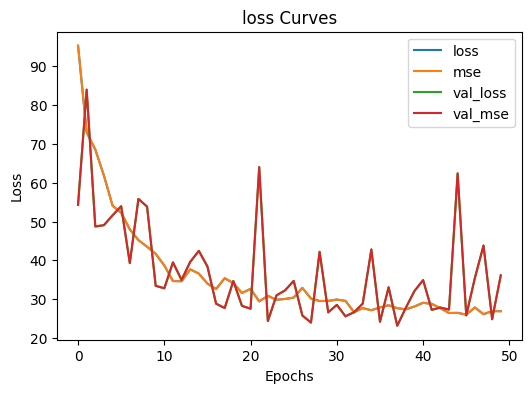

In [64]:
pd.DataFrame(history.history).plot(figsize=(6,4),xlabel="Epochs",ylabel="Loss",title="loss Curves")
plt.show()